# **DADOS DE CUSTOS MÉDICOS**

## **Carregando o PyCaret 

In [10]:
#instalar pycaret

In [11]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


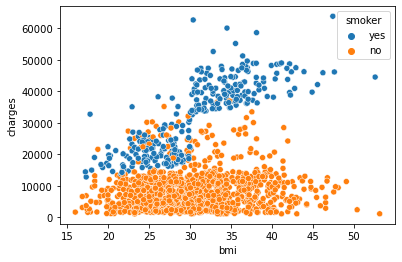

In [12]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Objetivo Primário: construir um bom modelo para previsão dos custos médicos de uma pessoa**

In [13]:
from pycaret.regression import * 

In [14]:
#?setup

In [15]:
# setup
regressao = setup(data = dados, 
                  target = 'charges', 
                  normalize = True,
                  n_jobs = 2)

,Description,Value
0,session_id,3422
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [17]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2300.8711,19502792.3747,4416.1966,0.8980,0.4348,0.3456
1,2592.4653,20981354.2011,4580.5408,0.8626,0.5015,0.3834
2,3507.1244,42085129.6514,6487.3053,0.7953,0.4961,0.3129
3,2087.7605,15981476.2039,3997.6839,0.8570,0.5190,0.3714
4,2179.4327,16623430.0996,4077.1841,0.8584,0.4543,0.2820
5,2230.7852,19811351.5118,4450.9944,0.8395,0.4536,0.2862
6,2381.9320,18355018.0517,4284.2757,0.8726,0.4184,0.3596
7,2841.2544,27394470.1307,5233.9727,0.8099,0.6273,0.4680
8,2400.7390,25797761.8959,5079.1497,0.7656,0.4187,0.2035
9,2544.3048,23078513.6154,4804.0102,0.8033,0.4704,0.3096


In [18]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2300.8711,19502792.3747,4416.1966,0.8980,0.4348,0.3456
1,2592.4653,20981354.2011,4580.5408,0.8626,0.5015,0.3834
2,3507.1244,42085129.6514,6487.3053,0.7953,0.4961,0.3129
3,2087.7605,15981476.2039,3997.6839,0.8570,0.5190,0.3714
4,2179.4327,16623430.0996,4077.1841,0.8584,0.4543,0.2820
5,2230.7852,19811351.5118,4450.9944,0.8395,0.4536,0.2862
6,2381.9320,18355018.0517,4284.2757,0.8726,0.4184,0.3596
7,2841.2544,27394470.1307,5233.9727,0.8099,0.6273,0.4680
8,2400.7390,25797761.8959,5079.1497,0.7656,0.4187,0.2035
9,2544.3048,23078513.6154,4804.0102,0.8033,0.4704,0.3096


In [19]:
rf_tunado = tune_model(rf, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1874.9898,17888394.1014,4229.4674,0.9064,0.3372,0.1762
1,2447.3048,23840069.8137,4882.6294,0.8439,0.4748,0.2465
2,3138.4728,39174459.9158,6258.9504,0.8095,0.4363,0.1811
3,1825.0459,13885549.3410,3726.3319,0.8758,0.4397,0.2651
4,1665.3796,12199037.2289,3492.7120,0.8961,0.3938,0.1781
5,1878.1882,16552180.1828,4068.4371,0.8659,0.3935,0.1838
6,1784.3544,13508830.1749,3675.4361,0.9062,0.2963,0.1587
7,2199.7018,22391611.4494,4731.9775,0.8446,0.4860,0.2365
8,2294.8007,27881038.4019,5280.2498,0.7466,0.4290,0.1765
9,2290.6537,23604801.9808,4858.4773,0.7988,0.4823,0.2144


In [ ]:
# Erro Médio Absoluto - MAE
#O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), 
#é calculado a partir da média dos erros absolutos, ou seja, 
#utilizamos o módulo de cada erro para evitar a subestimação, isso porque, 
#o valor é menos afetado por pontos especialmente extremos (outliers).

In [ ]:
#O erro quadrático médio, MSE (da sigla em inglês Mean Squared Error), 
#é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, 
#cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.

In [ ]:
#Se você entender o RMSE: (Erro quadrático médio da raiz), 
#MSE: (Erro médio quadrático) e RMS: (Média quadrática da raiz), 
#solicitar uma biblioteca para calculá-lo para você é uma engenharia excessiva desnecessária. 
#Todas essas métricas são uma única linha de código python com no máximo 2 polegadas de comprimento.

In [ ]:
#Entendendo o cálculo do R²
#O R², também chamado de Coeficiente de Determinação, diz o quanto meu modelo está prevendo corretamente. 
#O cálculo dele, envolve três medidas:

##Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. 
##É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.

##Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. 
##É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.

##Soma dos Quadrados de Regressão (SQR): oferece a variação de Y considerando as variáveis X utilizadas no modelo. 
##É a diferença entre o valor de SQT e SQU. Portanto: SQR = SQT — SQU

In [ ]:
#RMSLE - Erro de log do quadrado médio da raiz.
#Esta métrica é usada quando a variável de destino é convertida em Log (destino).
#então, em vez de olhar para RMSLE, você pode procurar por RMSE (geralmente usamos isso). 
#Você pode converter as previsões para ypred = exp (previsões)
#e então np.sqrt (mean_squared_error (y_test, ypred)) dará o RMSE final.

In [ ]:
#O que é MAPE?
#O erro médio de porcentagem absoluta (MAPE) 
#é uma medida estatística para definir a precisão de um algoritmo de aprendizado de máquina em um conjunto de dados específico.
#O MAPE pode ser considerado uma função de perda para definir o erro denominado pela avaliação do modelo.
#Usando o MAPE, podemos estimar a precisão em termos das diferenças nos valores reais estimados v / s.

In [20]:
# Comparando os modelos implementados, ordenando pelo RMSLE
melhores = compare_models(sort = 'RMSLE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2393.0397,21023723.2389,4521.7509,0.8498,0.4462,0.3086,0.0840
huber,Huber Regressor,3188.7938,45605355.0548,6681.1728,0.6753,0.4644,0.2082,0.0290
par,Passive Aggressive Regressor,3252.2825,45449649.8256,6665.6163,0.6769,0.4706,0.2078,0.0500
catboost,CatBoost Regressor,2546.4215,22918017.1899,4730.2290,0.8362,0.4731,0.3142,1.3660
et,Extra Trees Regressor,2542.1679,25906442.6704,5019.8463,0.8168,0.4744,0.3127,0.3070
rf,Random Forest Regressor,2506.6669,22961129.7736,4741.1313,0.8362,0.4794,0.3322,0.2860
dt,Decision Tree Regressor,2815.9557,39835955.5430,6281.7414,0.7091,0.5279,0.3643,0.0140
lightgbm,Light Gradient Boosting Machine,2699.9835,22708816.3591,4718.0454,0.8363,0.5575,0.3600,0.2230
ridge,Ridge Regression,4062.9081,35289514.0000,5869.0669,0.7497,0.5609,0.4101,0.0100
xgboost,Extreme Gradient Boosting,2927.3429,28146934.0000,5276.3623,0.7946,0.5610,0.4043,0.5410


In [21]:
melhores_tunados = []

for i in range(len(melhores)):
    melhores_tunados.append(tune_model(melhores[i], optimize = 'RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2569.7105,23985938.5477,4897.5441,0.8745,0.3627,0.2435
1,3157.0937,29961344.8492,5473.6957,0.8038,0.4593,0.3092
2,3921.6638,48187656.2429,6941.7329,0.7657,0.4189,0.2327
3,2089.6889,15203272.0170,3899.1373,0.8640,0.4474,0.3160
4,2409.7674,17713164.3444,4208.7010,0.8492,0.4045,0.2593
5,2147.2700,15875700.6218,3984.4323,0.8714,0.3735,0.2151
6,2397.9752,15760311.2115,3969.9258,0.8906,0.3011,0.2262
7,3042.2163,30104304.3834,5486.7390,0.7911,0.4799,0.2952
8,2958.8734,34157229.7094,5844.4187,0.6896,0.4301,0.2224
9,2861.0129,29845978.3821,5463.1473,0.7456,0.4589,0.2639


In [22]:
modelo_combinado = blend_models(melhores_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2815.3385,24415668.7316,4941.2214,0.8723,0.3452,0.2418
1,3085.5239,27834716.9772,5275.8617,0.8177,0.4187,0.2662
2,3997.2692,49026927.5864,7001.9231,0.7616,0.4218,0.2330
3,2101.7686,15339023.1510,3916.5065,0.8628,0.4112,0.2646
4,2274.6580,15591291.8684,3948.5810,0.8672,0.3895,0.2296
5,2209.0714,17218203.9483,4149.4824,0.8605,0.3731,0.1999
6,2470.2553,15457422.9439,3931.5929,0.8927,0.2710,0.2085
7,2977.7250,28249242.9997,5315.0017,0.8040,0.4760,0.2711
8,2870.8113,31159175.9196,5582.0405,0.7169,0.4114,0.2102
9,2835.3951,26998002.4186,5195.9602,0.7698,0.4278,0.2499


In [23]:
# Performance nos dados de validacao
pred = predict_model(modelo_combinado)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3225.7384,32562644.3606,5706.3688,0.7856,0.3914,0.2334


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.056487,-1.312872,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2457.501953,3407.543969
1,0.292007,2.586954,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45863.203125,38590.379849
2,0.150060,-0.149534,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9222.402344,8228.218928
3,0.362980,-0.056996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,38998.546875,33535.678529
4,1.072714,-0.899755,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25382.296875,29724.066073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.143687,1.116256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20630.283203,11026.077092
398,0.150060,0.273498,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6775.960938,7250.703811
399,0.433954,-0.321391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8516.829102,8945.457620
400,-0.275780,-2.096142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5116.500488,5870.711732


In [25]:
#pred.rename(columns={'Label': 'Pred'})

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Pred
0,-1.056487,-1.312872,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2457.501953,3407.543969
1,0.292007,2.586954,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45863.203125,38590.379849
2,0.150060,-0.149534,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9222.402344,8228.218928
3,0.362980,-0.056996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,38998.546875,33535.678529
4,1.072714,-0.899755,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25382.296875,29724.066073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.143687,1.116256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20630.283203,11026.077092
398,0.150060,0.273498,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6775.960938,7250.703811
399,0.433954,-0.321391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8516.829102,8945.457620
400,-0.275780,-2.096142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5116.500488,5870.711732


In [27]:
pred['Label']

0       3407.543969
1      38590.379849
2       8228.218928
3      33535.678529
4      29724.066073
           ...     
397    11026.077092
398     7250.703811
399     8945.457620
400     5870.711732
401    12979.408674
Name: Label, Length: 402, dtype: float64

In [28]:
evaluate_model(modelo_combinado)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = finalize_model(modelo_combinado)

In [30]:
predict_model(modelo_combinado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3225.7384,32562644.3606,5706.3688,0.7856,0.3914,0.2334


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.056487,-1.312872,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2457.501953,3407.543969
1,0.292007,2.586954,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45863.203125,38590.379849
2,0.150060,-0.149534,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9222.402344,8228.218928
3,0.362980,-0.056996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,38998.546875,33535.678529
4,1.072714,-0.899755,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25382.296875,29724.066073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.143687,1.116256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20630.283203,11026.077092
398,0.150060,0.273498,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6775.960938,7250.703811
399,0.433954,-0.321391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8516.829102,8945.457620
400,-0.275780,-2.096142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5116.500488,5870.711732


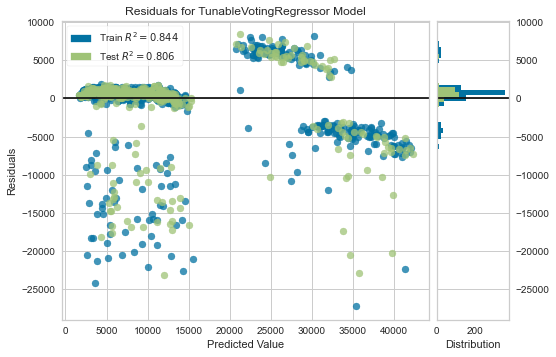

In [31]:
plot_model(modelo_final)


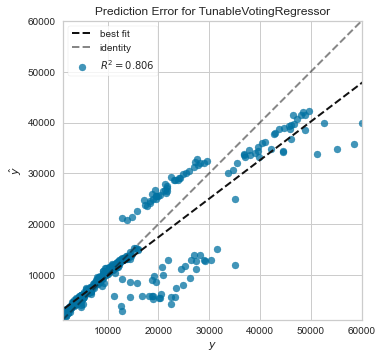

In [32]:
plot_model(modelo_final, plot = 'error')

In [41]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-charges')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                          max_leaf_nodes=None,
                                                                          max_samples=None,
                                                                          min_impurity_decrease=0.01,
                        

In [ ]:
## Simulando um deploy via Jupter

In [42]:
# Deploy Básico

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-charges')

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))


In [35]:
CustoSeguro(age = 31, sex = 'male', bmi = 25, children = 0, smoker =  'no', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 31
Sexo: male
IMC: 25
Crianças: 0
Fumante: no
Região: southwest
 
Custo do Seguro: $4353.37
Valor de Venda: $7836.07


In [36]:
CustoSeguro(45, 'female', 20, 2, 'yes', 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 45
Sexo: female
IMC: 20
Crianças: 2
Fumante: yes
Região: southwest
 
Custo do Seguro: $26881.83
Valor de Venda: $48387.29


---

## **Objetivo secundário: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [ ]:
from pycaret.classification import *

In [ ]:
class_setup = setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = 2)

In [ ]:
models()

In [ ]:
todos = compare_models(n_select = 18, turbo = False)

In [ ]:
#?compare_models

In [ ]:
top7_tunados = [tune_model(i) for i in todos[:7]]


In [ ]:
top7_tunados

In [ ]:
import pandas as pd
results = pd.DataFrame()

In [ ]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i]) 

In [ ]:
combinacao_soft = blend_models(top7_tunados, method = 'soft') # os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

In [ ]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta. 

In [ ]:
preds = predict_model(combinacao_soft, data = dados)

In [ ]:
preds.sample(20).sort_values(by = 'Score')

In [ ]:
plot_model(combinacao_soft)

In [ ]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

---

In [ ]:
pred = predict_model(combinacao_soft)

## Utilizando a função predict_proba podemos tomar os valores das probabilidades dada pelo modelo. E podemos ver que o que acontece na variável 'Score' é que a probabilidade apresentada é sempre a de pertencer a resposta classificada, por isso então a suposta incoerência nos valores observados. 

---

## Utilizando o modelo selecionado na propria base para identificar possiveis fraudadores

In [ ]:
pred = predict_model(combinacao_soft, data = dados)

## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [ ]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

## Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [ ]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

In [ ]:
modelo_final = finalize_model(combinacao_soft)

In [ ]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

In [ ]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-smoker')
 
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [ ]:
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 20000)

In [ ]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)